In [1]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical

## Import train dataset, create x, y, transform to the right format

In [2]:
train=pd.read_csv('fashion-mnist_train.csv')
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
x_train=train.loc[:,'pixel1':'pixel784']
x_train=np.array(x_train)
y_train=train.loc[:,'label']
y_train=to_categorical(np.array(y_train))

## Import test dataset, create x, y, transform to the right format

In [4]:
test=pd.read_csv('fashion-mnist_test.csv')
test.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
x_test=test.loc[:,'pixel1':'pixel784']
x_test=np.array(x_test)
y_test=test.loc[:,'label']
y_test=to_categorical(np.array(y_test))

## Sizes of train and test datasets

In [6]:
print('TRAIN size:', train.size, 'TEST size:', test.size)

TRAIN size: 47100000 TEST size: 7850000


## Create and compile neural network model

In [27]:
model=Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_8 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2010      
Total params: 91,710
Trainable params: 91,710
Non-trainable params: 0
_________________________________________________________________


## Fit model with train data and validation data

In [28]:
hist=model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9536 - accuracy: 0.7367 - val_loss: 0.5615 - val_accuracy: 0.8050
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5289 - accuracy: 0.8124 - val_loss: 0.5221 - val_accuracy: 0.8108
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4808 - accuracy: 0.8295 - val_loss: 0.4976 - val_accuracy: 0.8204
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4411 - accuracy: 0.8429 - val_loss: 0.4511 - val_accuracy: 0.8405
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4250 - accuracy: 0.8477 - val_loss: 0.4374 - val_accuracy: 0.8432
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4093 - accuracy: 0.8525 - val_loss: 0.4465 - val_accuracy: 0.8393
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4006 - accuracy: 0.8570 - val_loss: 0.4322 - val_ac

1500/1500 [==============================] - 2s 1ms/step - loss: 0.2859 - accuracy: 0.8974 - val_loss: 0.4880 - val_accuracy: 0.8698
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2759 - accuracy: 0.9004 - val_loss: 0.4505 - val_accuracy: 0.8703
Epoch 59/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2775 - accuracy: 0.8978 - val_loss: 0.4541 - val_accuracy: 0.8717
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2925 - accuracy: 0.8953 - val_loss: 0.4706 - val_accuracy: 0.8693
Epoch 61/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2713 - accuracy: 0.9011 - val_loss: 0.5487 - val_accuracy: 0.8548
Epoch 62/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2872 - accuracy: 0.8974 - val_loss: 0.4876 - val_accuracy: 0.8672
Epoch 63/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.9011 - val_loss: 0.4737 - val_accuracy

## Plot Acccuracy and Loss

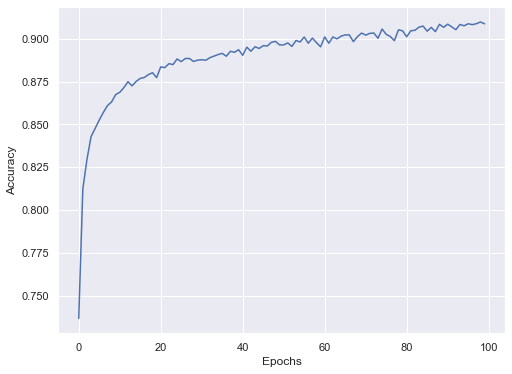

In [29]:
import seaborn as sns
sns.set()
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

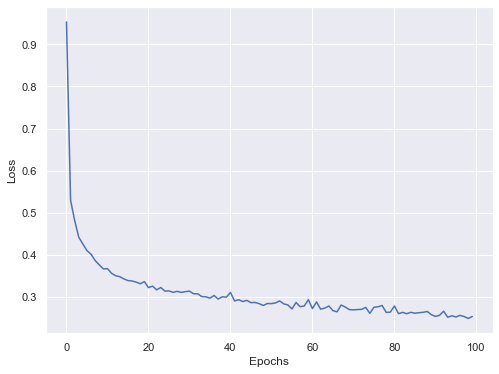

In [30]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Make predictions on the test data

In [31]:
predictions=model.predict(x_test)
predictions

array([[9.9211484e-01, 8.5498428e-08, 2.6685465e-04, ..., 0.0000000e+00,
        1.0816094e-04, 0.0000000e+00],
       [1.0688007e-35, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.1421710e-35, 0.0000000e+00],
       [7.4385770e-02, 6.1600113e-05, 4.7939971e-01, ..., 6.8545349e-27,
        2.0512622e-02, 3.1322670e-27],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [8.4201992e-02, 4.8175030e-11, 1.0358924e-01, ..., 2.3315275e-36,
        6.8815994e-01, 0.0000000e+00],
       [2.9439488e-04, 9.8944074e-01, 1.3651644e-05, ..., 0.0000000e+00,
        3.5891667e-04, 0.0000000e+00]], dtype=float32)

## Replace max value of propability on binary coding clases

In [32]:
for i in predictions:
    i[i.argmax()]=1
    print(predictions)

[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 4.7939971e-01 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 4.7939971e-01 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-11 1.0358924e-01 ... 2.3315275e-36
  6.8815994e-01 0.0000000e+00]
 [2.9439488e-04 9.8944074e-01 1.3651644e-05 ... 0.0000000e+00
  3.5891667e-04 0.0000000e+00]]
[[1.0000000e+00 8.5498428e-08 2.6685465e-04 ... 0.0000000e+00
  1.0816094e-04 0.0000000e+00]
 [1.0688007e-35 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1421710e-35 0.0000000e+00]
 [7.4385770e-02 6.1600113e-05 1.0000000e+00 ... 6.8545349e-27
  2.0512622e-02 3.1322670e-27]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [8.4201992e-02 4.8175030e-

## Calculate propability of model comparing predictions and real test data

In [33]:
propability_true_clases=((y_test*predictions).sum())/len(predictions)
print('Propability of true classificated classes is:',propability_true_clases*100)

Propability of true classificated classes is: 89.5196875
